## NAMA    : PADHLI MAULANA
## NIM        : 09011381722119
## KELAS   : SK5U

## Bank Customer Classification
Dataset yang berisi informasi Nasabah Bank, saya akan membuat classifier yang akan memberi tahu  apakah pelanggan akan keluar dari bank atau tidak.

# 1. Import Library

In [1]:
import theano
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Langkah pertama yang kita lakukan adalah mengimport library yang akan kita gunakan.
- Library Numpy 

   berfungsi untuk mengolah data dalam bentuk angka (array)
  
  
- Library Matplotlib 

   berfungsi untuk membantu visualisasi dataset sehingga memudahkan untuk dipahami
  
  
- Library Theano

  Theano adalah pustaka Python dan mengoptimalkan kompiler untuk memanipulasi dan mengevaluasi ekspresi matematika, terutama   yang bernilai matriks.
  
  
- Library Pandas

  Berfungsi untuk membaca file dataset dalam bentuk .CSV
  
  
- Library Tensorflow

  tensorflow adalah tools untuk melakukan komputasi numerik (lebih luas daripada hanya sekedar untuk deep learning).

## Data Preprocessing

#### Dataset tersebut memiliki 13 anggota dengan 1 parameter Output
1. Rownumber
2. Customerld (Pelanggan)
3. Surename (Nama Pelanggan)
4. CreditScore
5. Geography (letak negara)
6. Gender (Laki-Laki,Perempuan)
7. Age (umur)
8. Tenure
9. Balance
10. NumOfProducts
11. HasCrCard
12. IsActiveNumber
13. EstimatedSalary
14. Exited (OUTPUT) -> (1 = Keluar dari bank, 0 = tidak keluar dari bank))

Dalam dataset ini, saya harus mempertimbangkan faktor mana yang mungkin berperan dalam seseorang yang keluar dari bank. Untuk melakukan itu saya harus melihat semua kolom dan menyimpulkan apakah penting untuk mengklasifikasikan pelanggan baru atau tidak. Informasi tentang pelanggan disyaratkan dalam kolom 1 hingga 13 (RowNumber-EstimatedSalary), sedangkan output (apakah pelanggan keluar atau tidak) disimpan di baris ke-14 (Keluar) .

Selama kita peduli, baik ID pelanggan, maupun nama keluarga tidak boleh penting dalam klasifikasi. Karena itu, kami akan menggunakan kolom 3 (CreditScore) inklusif melalui kolom ke-13 (eksklusif).



In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Dari dataset diatas bdapat di lihat bahwa data berisi 10.000 baris dan 14 kolom

## Mengecek apakah ada data kosong
Setelah kita menimport dataset ada baiknya kita terlebih dahulu melakukan pegecekaan terhadap dataset kita, apakah data tersebih sudah bersih atau masih ada data kosong.

In [3]:
dataset.isnull().any().sum()

0

### Menentukan Features dan Labels
features dimulai dari kolom 4 - 13 sedangkan untuk Lables sendiri kita ambil pada kolom terakhir yakni kolom 14

In [4]:
X = dataset.iloc[:,3:13].values # Credit Score through Estimated Salary
y = dataset.iloc[:, 13].values # Exited

In [5]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
print(X[:8,1], '... will now become: ')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print(X[:8,1])

['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany'] ... will now become: 
[0 2 0 0 2 2 0 1]


Masalahnya di sini adalah bahwa kita memperlakukan negara sebagai satu variabel dengan nilai ordinal (0 <1 <2). Oleh karena itu, salah satu cara untuk menyingkirkan masalah itu adalah dengan membagi negara-negara ke dalam dimensi masing-masing. itu adalah :

<table>
    <tr>
        <th>Country</th>
        <th>--></th>
        <th>Country</th>
        <th>--></th>
        <th>France</th>
        <th>Germany</th>
        <th>Spain</th>
    </tr>
    <tr>
        <td>France</td>
        <td>--></td>
        <td>0</td>
        <td>--></td>
        <td>1</td>
        <td>0</td>
        <td>0</td>  
    </tr>
     <tr>
        <td>Germany</td>
        <td>--></td>
        <td>1</td>
        <td>--></td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
     <tr>
        <td>Spain</td>
        <td>--></td>
        <td>2</td>
        <td>--></td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
    </tr>
    
</table>

In [6]:
# We will do the same thing for gender. this will be binary in this dataset
print(X[:6,2], '... will now become: ')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:6,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 
[0 0 0 0 0 1]


Gender tidak perlu melalui proses yang sama karena ini adalah biner

In [7]:
# Converting the string features into their own dimensions. Gender doesn't matter here because its binary
countryhotencoder = OneHotEncoder(categorical_features = [1]) # 1 is the country column
X = countryhotencoder.fit_transform(X).toarray()

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [8]:
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

sekarang kita dapat melihat bahwa tiga kolom pertama mewakili tiga negara yang membentuk kategori "negara". Kita sekarang dapat mengamati bahwa pada dasarnya kita hanya membutuhkan dua kolom: a 0 pada dua negara berarti bahwa negara tersebut harus menjadi satu variabel yang tidak termasuk. Ini akan menyelamatkan kita dari masalah menggunakan terlalu banyak dimensi.






<table>
    <tr>
        <th>France</th>
        <th>Germany</th>
        <th>Spain</th>
        <th>--></th>
        <th>Germany</th>
        <th>Spain</th>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>0</td>
        <td>--></td>
        <td>0</td>
        <td>0</td>
    </tr>
     <tr>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>--></td>
         <td>1</td>
        <td>0</td>
    </tr>
     <tr>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>--></td>
         <td>0</td>
        <td>1</td>
    </tr>
    
</table>

In [9]:
X = X[:,1:] 

Menyingkirkan France sebagai dimensi. Itu masih ada melalui kesimpulan

## Splitting dan Modelling 

In [10]:
# Splitting the dataset into the Training and Testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

Penskalaan fitur adalah metode yang digunakan untuk menstandarisasi berbagai variabel independen atau fitur data. Ini pada dasarnya skala semua dimensi menjadi bahkan sehingga satu variabel independen tidak mendominasi yang lain. Misalnya, saldo rekening bank berkisar dari jutaan hingga 0, sedangkan jenis kelaminnya 0 atau 1. Jika salah satu fitur memiliki rentang nilai yang luas, jarak akan diatur oleh fitur khusus ini. Oleh karena itu, rentang semua fitur harus dinormalisasi sehingga setiap fitur berkontribusi sekitar secara proporsional terhadap jarak akhir.

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train

array([[-0.5698444 ,  1.74309049,  0.16958176, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-0.5698444 , -0.57369368,  0.9015152 , ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -0.62420521, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -0.28401079, ...,  0.64259497,
        -1.03227043,  0.32472465]])

### END OF PREPROCESSING

#### Making the ANN

In [13]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [14]:
# Initializing the ANN
classifier = Sequential()

Sebuah ujung yang berbahaya adalah bahwa jumlah node (dimensi) di lapisan tersembunyi Anda harus menjadi rata-rata dari layer input dan output Anda, yang berarti bahwa karena kami memiliki 11 dimensi (mewakili variabel independen Catatan: Negara-negara masih menyusun hanya satu dimensi) dan kami sedang mencari keluaran biner, kami menghitung ini menjadi (11 + 1) ÷ 2 = 6

.
Rincian input untuk lapisan pertama adalah sebagai berikut:

activiation: relu karena kita berada di lapisan input. menggunakan fungsi aktivasi ReLu untuk ϕ

input_dim: 11 karena kami menjangkau 11 dimensi di lapisan input kami. Ini diperlukan untuk lapisan tambahan pertama. Dimensi input layer selanjutnya dapat disimpulkan menggunakan dimensi output layer yang ditambahkan sebelumnya. Lapisan tersembunyi berikutnya akan tahu apa yang diharapkan.

unit: 6 node (jumlah node di lapisan tersembunyi). Dapat menganggap ini sebagai jumlah node di lapisan berikutnya.

kernel_initializer: seragam distribusi dengan mana kita secara acak menginisialisasi bobot untuk node di lapisan ini.

In [15]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(activation = 'relu', input_dim = 11, units=6, kernel_initializer='uniform'))

Saya akan menambahkan lapisan lain ke model ini karena saya ingin menerapkan Deep Learning, yang merupakan jaringan saraf tiruan dengan banyak lapisan.

Kami akan membuat layer tersembunyi kedua kami juga memiliki 6 node, hanya bermain dengan aritmatika yang sama yang kami gunakan untuk menentukan dimensi dari layer tersembunyi pertama (rata-rata layer input dan output Anda) (11 + 1) ÷ 2 = 6.

In [16]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(activation = 'relu', units=6, kernel_initializer='uniform')) 

Menambahkan lapisan output
Rincian input untuk lapisan keluaran adalah sebagai berikut:

- activiation: sigmoid karena kita berada dalam lapisan output. menggunakan fungsi aktivasi Sigmoid untuk Ini digunakan sebagai ganti fungsi ReLu karena ia menghasilkan probabilitas untuk hasilnya. Kami ingin probabilitas bahwa setiap pelanggan meninggalkan bank.


- input_dim: 11 karena kami menjangkau 11 dimensi di lapisan input kami. Ini diperlukan untuk lapisan tambahan pertama. Dimensi input layer selanjutnya dapat disimpulkan menggunakan dimensi output layer yang ditambahkan sebelumnya. Lapisan tersembunyi berikutnya akan tahu apa yang diharapkan.


- unit: 6 node (jumlah node di lapisan tersembunyi). Dapat menganggap ini sebagai jumlah node di lapisan berikutnya.


- kernel_initializer: seragam distribusi dengan mana kita secara acak menginisialisasi bobot untuk node di lapisan ini.


In [17]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(activation = 'sigmoid', units=1, kernel_initializer='uniform'))

Jika ingin lebih dari dua kategori, maka kita perlu berubah

1) parameter unit agar sesuai dengan jumlah kategori yang diinginkan

2) bidang aktivasi ke softmax. Pada dasarnya fungsi sigmoid tetapi diterapkan pada variabel dependen yang memiliki lebih dari 2 kategori.


### Compiling the Neural Network

Pada dasarnya menerapkan keturunan Gradien Stochastic pada seluruh Jaringan Saraf Tiruan. Kami menyetel bobot individu pada setiap neuron.
Rincian input untuk kompilasi adalah sebagai berikut:

- optimizer: adam Algoritma yang ingin kita gunakan untuk menemukan set bobot optimal dalam jaringan saraf. Adam adalah variasi yang sangat efektif dari Stochastic Gradient Descent.


- loss: binary_crossentropy Ini adalah fungsi loss yang digunakan dalam adam. Ini harus menjadi kerugian logarthmic. Jika dependen kami (variabel output) adalah Biner, itu adalah binary_crossentropy. Jika Kategorikal, maka itu disebut kategorikal_crossentropi


- metrik: [akurasi] Metrik akurasi yang akan dievaluasi (diminimalkan) oleh model. Digunakan sebagai kriteria akurasi untuk meningkatkan kinerja model.


- kernel_initializer: seragam distribusi dengan mana kita secara acak menginisialisasi bobot untuk node di lapisan ini.

In [18]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Fitting the Neural Network

Di sinilah saya akan menyesuaikan JST ke set training.
Rincian input untuk kompilasi adalah sebagai berikut:

- X_train Bagian variabel independen dari data yang perlu dipasangkan dengan model.

- Y_train Bagian output dari data yang model perlu hasilkan setelah pemasangan.

- batch_size: Seberapa sering kita ingin melakukan back-propogate nilai kesalahan sehingga bobot masing-masing simpul dapat disesuaikan.

- nb_epochs: Frekuensi kami ingin menjalankan seluruh data pengujian lagi untuk menyesuaikan bobotnya. Ini seperti bahan bakar dari algoritma.

In [19]:
acc_training = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=200)
acc_testing  = classifier.evaluate(X_test,y_test) 


Train on 8000 samples, validate on 2000 samples
Epoch 1/200
8000/8000 [==============================] - 2s 232us/step - loss: 0.6605 - accuracy: 0.7929 - val_loss: 0.6306 - val_accuracy: 0.7975
Epoch 2/200
8000/8000 [==============================] - 1s 140us/step - loss: 0.6077 - accuracy: 0.7960 - val_loss: 0.5864 - val_accuracy: 0.7975
Epoch 3/200
8000/8000 [==============================] - 2s 196us/step - loss: 0.5336 - accuracy: 0.8010 - val_loss: 0.4261 - val_accuracy: 0.8345
Epoch 4/200
8000/8000 [==============================] - 2s 240us/step - loss: 0.4141 - accuracy: 0.8264 - val_loss: 0.4024 - val_accuracy: 0.8390
Epoch 5/200
8000/8000 [==============================] - 1s 145us/step - loss: 0.4071 - accuracy: 0.8310 - val_loss: 0.3983 - val_accuracy: 0.8365
Epoch 6/200
8000/8000 [==============================] - 1s 179us/step - loss: 0.4027 - accuracy: 0.8309 - val_loss: 0.3936 - val_accuracy: 0.8380
Epoch 7/200
8000/8000 [==============================] - 1s 185us/ste

Epoch 55/200
8000/8000 [==============================] - 1s 110us/step - loss: 0.3427 - accuracy: 0.8585 - val_loss: 0.3383 - val_accuracy: 0.8550
Epoch 56/200
8000/8000 [==============================] - 1s 103us/step - loss: 0.3419 - accuracy: 0.8586 - val_loss: 0.3385 - val_accuracy: 0.8550
Epoch 57/200
8000/8000 [==============================] - 1s 102us/step - loss: 0.3419 - accuracy: 0.8589 - val_loss: 0.3367 - val_accuracy: 0.8540
Epoch 58/200
8000/8000 [==============================] - 1s 164us/step - loss: 0.3413 - accuracy: 0.8596 - val_loss: 0.3396 - val_accuracy: 0.8520
Epoch 59/200
8000/8000 [==============================] - 2s 245us/step - loss: 0.3417 - accuracy: 0.8601 - val_loss: 0.3431 - val_accuracy: 0.8525
Epoch 60/200
8000/8000 [==============================] - 1s 154us/step - loss: 0.3416 - accuracy: 0.8585 - val_loss: 0.3374 - val_accuracy: 0.8540
Epoch 61/200
8000/8000 [==============================] - 1s 179us/step - loss: 0.3413 - accuracy: 0.8577 - val_

8000/8000 [==============================] - 1s 147us/step - loss: 0.3356 - accuracy: 0.8595 - val_loss: 0.3394 - val_accuracy: 0.8555
Epoch 166/200
8000/8000 [==============================] - 1s 125us/step - loss: 0.3363 - accuracy: 0.8620 - val_loss: 0.3380 - val_accuracy: 0.8590
Epoch 167/200
8000/8000 [==============================] - 1s 154us/step - loss: 0.3362 - accuracy: 0.8601 - val_loss: 0.3388 - val_accuracy: 0.8570
Epoch 168/200
8000/8000 [==============================] - 1s 144us/step - loss: 0.3354 - accuracy: 0.8618 - val_loss: 0.3389 - val_accuracy: 0.8575
Epoch 169/200
8000/8000 [==============================] - 1s 131us/step - loss: 0.3357 - accuracy: 0.8621 - val_loss: 0.3363 - val_accuracy: 0.8595
Epoch 170/200
8000/8000 [==============================] - 2s 207us/step - loss: 0.3361 - accuracy: 0.8611 - val_loss: 0.3384 - val_accuracy: 0.8590
Epoch 171/200
8000/8000 [==============================] - 2s 220us/step - loss: 0.3358 - accuracy: 0.8624 - val_loss: 0

In [20]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.8610000014305115


In [21]:
acc_training.history

{'val_loss': [0.6305841798782349,
  0.5863500728607177,
  0.42610198402404786,
  0.4024295380115509,
  0.3982703940868378,
  0.3936412292718887,
  0.39043821740150453,
  0.38674745869636534,
  0.38132615625858307,
  0.37911401855945587,
  0.3754709913730621,
  0.3727905408143997,
  0.3716309788227081,
  0.36843331360816955,
  0.3652129392623901,
  0.36292798614501953,
  0.3641251065731049,
  0.3595560941696167,
  0.3570224460363388,
  0.35713489484786987,
  0.35488999271392824,
  0.3529081835746765,
  0.35320826268196104,
  0.35059227180480956,
  0.3491491792201996,
  0.3502049390077591,
  0.3479452464580536,
  0.3514718645811081,
  0.3448133797645569,
  0.34717449259757993,
  0.3462997132539749,
  0.34643811750411985,
  0.34394214034080506,
  0.3482433104515076,
  0.3440469584465027,
  0.3422135463953018,
  0.34170296835899355,
  0.34182237815856936,
  0.3428291759490967,
  0.3416092355251312,
  0.3439175938367844,
  0.3416691575050354,
  0.3444209772348404,
  0.34215475273132323,
  0

## Plotting Model Akurasi dan Loss Akurasi

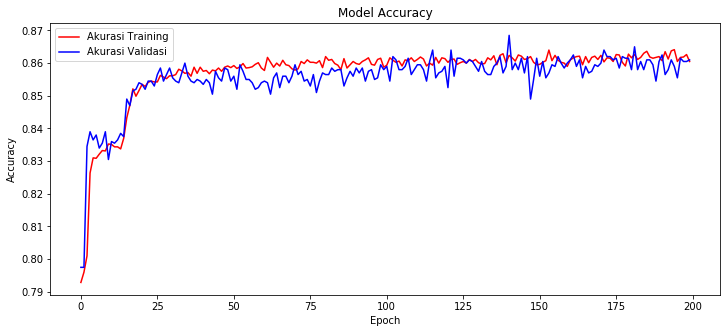

In [22]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

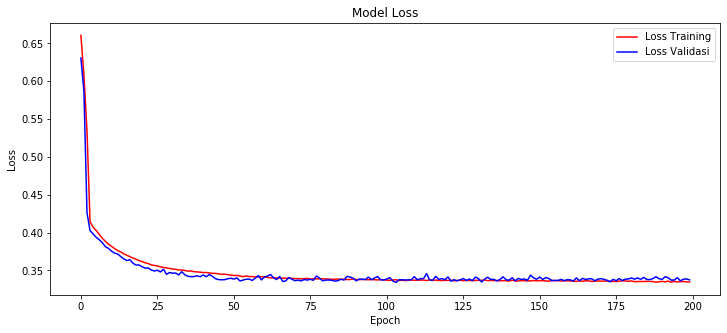

In [23]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

In [24]:
training_predicted = classifier.predict(X_train)
testing_predicted = classifier.predict(X_test)

In [25]:
training_predicted.round()

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

## Matriks Confusion
Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya.

Berdasarkan jumlah keluaran kelasnya, sistem klasifikasi dapat dibagi menjadi 4 (empat) jenis yaitu :
- klasifikasi binary
- multi-class
- multi-label 
- hierarchical

Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi. Keempat istilah tersebut adalah:

1) True Positive (TP)

2) True Negative (TN)

3) False Positive (FP) 

4) False Negative (FN)
- True Negative (TN) merupakan jumlah data negatif yang terdeteksi dengan benar, 
- sedangkan False Positive (FP) merupakan data negatif namun terdeteksi sebagai data positif. Sementara itu, 
- True Positive (TP) merupakan data positif yang terdeteksi benar.
- False Negative (FN) merupakan kebalikan dari True Positive, sehingga data posifit, namun terdeteksi sebagai data negatif.
    
    


 Berdasarkan nilai True Negative (TN), False Positive (FP), False Negative (FN), dan True Positive (TP) dapat diperoleh nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score.Untuk memperoleh nilai akurasi, presisi dan recall kita dapat menggunakan rumus :

$$Accuracy = \frac {tp+tn}{tp+tn+fp+fn}$$

$$Specificity = \frac {tn}{tn+fp}$$

$$Sensitivity = \frac {tp}{tp+fn}$$

$$Precision = \frac {tp}{tp+fp}$$

$$F1 Score = \frac {2 \times Sensitivity \times Precision}{Sensitivity+ Precision}$$

Menghitung Confusion Matrix pada dataset yang telah diolah, kita deklarasikan model predict dari data training dan data testing

In [26]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(y_train,training_predicted.round())
testing_cm = confusion_matrix(y_test,testing_predicted.round())

Hasil Confusion Matrix dari data training

In [27]:
training_cm

array([[6108,  260],
       [ 838,  794]], dtype=int64)

Hasil perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada data training

In [28]:
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.86275
Specificity training 0.48651960784313725
Sensitivity training 0.9591708542713567
Precision training 0.8793550244745177
F1 Score training 0.9175304191077062


Hasil Confusion Matrix dari data testing

In [29]:
testing_cm

array([[1516,   79],
       [ 199,  206]], dtype=int64)

Hasil perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada data testing

In [30]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.861
Specificity testing 0.508641975308642
Sensitivity testing 0.9504702194357367
Precision testing 0.8839650145772595
F1 Score testing 0.9160120845921451


## # Referensi 
- Paper : Customer churn prediction by hybrid neural networks
- dataset : https://www.kaggle.com/barelydedicated/bank-churn-rate-prediction